In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import sklearn
from sklearn.cluster import KMeans

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
#Prendo il dataframe
df= pd.read_csv("final_dataframe.csv",index_col=0)
df

,Artist,Song,uri,Acousticness,Danceability,Liveness,Loudness,Speechiness
0,Mac DeMarco,Another One,spotify:track:3pXAa69soxZ98bQ1gr18HO,0.821000,0.694,0.106,0.739022,0.0276
1,alt-J,Breezeblocks,spotify:track:3n69hLUdIsSa1WlRmjMZlW,0.096000,0.616,0.205,0.821277,0.0344
2,Francesco De Gregori,Rimmel,spotify:track:515XcapFOMtOOiGU31UqNp,0.620000,0.500,0.106,0.624891,0.0544
3,Vinicio Capossela,Marajà - 2018 Remaster,spotify:track:70EXIyETxgloAlVkRbO2H9,0.172000,0.486,0.059,0.844239,0.0913
4,The Books,The Lemon of Pink I,spotify:track:6WkwB5tjvgw8zjdKSOfl0S,0.887000,0.626,0.178,0.660978,0.0529
...,...,...,...,...,...,...,...,...
4312,Caparezza,Messa In Moto,spotify:track:6cg4SNSGiqYRA34opvo2G2,0.001350,0.573,0.235,0.897418,0.2090
4313,Caparezza,Non Siete Stato Voi,spotify:track:69kLZ80Yv9v35H6PLfmnjc,0.020400,0.409,0.143,0.882147,0.2970
4314,Caparezza,La Ghigliottina,spotify:track:3uisLZ2RNXGAF6rkGfquXF,0.000676,0.685,0.132,0.862554,0.0535
4315,Caparezza,Ti Sorrido Mentre Affogo,spotify:track:1oszMEEhMfia4uecZwZPDk,0.001030,0.750,0.441,0.886440,0.0787


In [3]:
#Considero le feature per il clustering
songs_features = df.copy()
songs_features = songs_features.drop(['Artist','Song','uri'],axis=1)
songs_features

,Acousticness,Danceability,Liveness,Loudness,Speechiness
0,0.821000,0.694,0.106,0.739022,0.0276
1,0.096000,0.616,0.205,0.821277,0.0344
2,0.620000,0.500,0.106,0.624891,0.0544
3,0.172000,0.486,0.059,0.844239,0.0913
4,0.887000,0.626,0.178,0.660978,0.0529
...,...,...,...,...,...
4312,0.001350,0.573,0.235,0.897418,0.2090
4313,0.020400,0.409,0.143,0.882147,0.2970
4314,0.000676,0.685,0.132,0.862554,0.0535
4315,0.001030,0.750,0.441,0.886440,0.0787


In [4]:
#faccio una previsione per il plotting
Sums_of_squared_distances= []
K= range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km.fit(songs_features)
    Sums_of_squared_distances.append(km.inertia_)


In [5]:

from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4206865605908419)
For n_clusters = 3, silhouette score is 0.41044630031549784)
For n_clusters = 4, silhouette score is 0.3135328144870461)
For n_clusters = 5, silhouette score is 0.24840341945625874)
For n_clusters = 6, silhouette score is 0.25745957939225145)
For n_clusters = 7, silhouette score is 0.2518646155241957)
For n_clusters = 8, silhouette score is 0.2535738673143001)
For n_clusters = 9, silhouette score is 0.2371445954806877)
For n_clusters = 10, silhouette score is 0.23352799096193705)
For n_clusters = 11, silhouette score is 0.22130180858974352)
For n_clusters = 12, silhouette score is 0.21752017623003408)
For n_clusters = 13, silhouette score is 0.20798979619206834)
For n_clusters = 14, silhouette score is 0.2072714400412695)


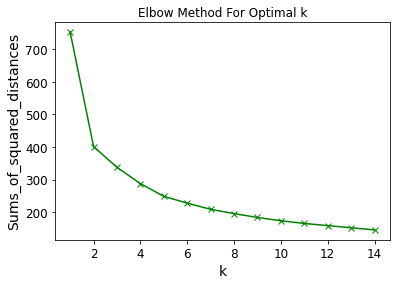

In [6]:
#Eseguo il plotting e noto che il punto di curvatura è tra il 4 ed il 3, considero 4 cluster
plt.plot(K, Sums_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sums_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)

KMeans(n_clusters=4)

In [8]:
#Assegno le label
y_kmeans = kmeans.predict(songs_features)
df['label'] = y_kmeans
df

,Artist,Song,uri,Acousticness,Danceability,Liveness,Loudness,Speechiness,label
0,Mac DeMarco,Another One,spotify:track:3pXAa69soxZ98bQ1gr18HO,0.821000,0.694,0.106,0.739022,0.0276,3
1,alt-J,Breezeblocks,spotify:track:3n69hLUdIsSa1WlRmjMZlW,0.096000,0.616,0.205,0.821277,0.0344,1
2,Francesco De Gregori,Rimmel,spotify:track:515XcapFOMtOOiGU31UqNp,0.620000,0.500,0.106,0.624891,0.0544,3
3,Vinicio Capossela,Marajà - 2018 Remaster,spotify:track:70EXIyETxgloAlVkRbO2H9,0.172000,0.486,0.059,0.844239,0.0913,1
4,The Books,The Lemon of Pink I,spotify:track:6WkwB5tjvgw8zjdKSOfl0S,0.887000,0.626,0.178,0.660978,0.0529,3
...,...,...,...,...,...,...,...,...,...
4312,Caparezza,Messa In Moto,spotify:track:6cg4SNSGiqYRA34opvo2G2,0.001350,0.573,0.235,0.897418,0.2090,1
4313,Caparezza,Non Siete Stato Voi,spotify:track:69kLZ80Yv9v35H6PLfmnjc,0.020400,0.409,0.143,0.882147,0.2970,1
4314,Caparezza,La Ghigliottina,spotify:track:3uisLZ2RNXGAF6rkGfquXF,0.000676,0.685,0.132,0.862554,0.0535,1
4315,Caparezza,Ti Sorrido Mentre Affogo,spotify:track:1oszMEEhMfia4uecZwZPDk,0.001030,0.750,0.441,0.886440,0.0787,1


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


In [10]:
pca.explained_variance_ratio_

array([0.58715046, 0.17898514])

In [11]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      Acousticness  Danceability  Liveness  Loudness  Speechiness
PC-1      0.978829     -0.094504 -0.009754 -0.179469    -0.025664
PC-2     -0.022928     -0.422283  0.904885  0.048300    -0.001167


In [22]:
#Usiamo songs come shuffle del df originale
songs = df.sample(frac=1)
songs['label'].value_counts()

1    2130
0    1028
3     863
2     296
Name: label, dtype: int64

In [24]:
songs[songs['label'] == 0].tail(20)

,Artist,Song,uri,Acousticness,Danceability,Liveness,Loudness,Speechiness,label
3193,Fabrizio De André,Nella Mia Ora Di Libertà,spotify:track:2xdBfSm0JdGK49bO2CGvq3,0.524,0.553,0.0553,0.762853,0.0732,0
2749,The Velvet Underground,Sweet Bonnie Brown (It's Just Too Much) - Live...,spotify:track:0h4Stc4GtxDTXFzdqvL3Kk,0.536,0.391,0.1570,0.718587,0.0339,0
2992,The Velvet Underground,Who Loves the Sun - 2015 Remaster,spotify:track:1rJi8cf8OWsrX4CqBnMSoQ,0.326,0.441,0.3680,0.779565,0.0298,0
491,Skiantos,Gelati,spotify:track:4ev5szLqL3A1wChSZbBaBe,0.538,0.646,0.0872,0.824185,0.2600,0
2206,King Gizzard & The Lizard Wizard,Sense,spotify:track:7tUUZ74ZhKN8B1IiMREYlO,0.505,0.534,0.1880,0.771277,0.2800,0
3687,The Irish Rovers,Green Grows the Laurel,spotify:track:2gXCzScMbHNO5s3mIjKb0H,0.598,0.515,0.2450,0.732935,0.0930,0
921,Louis Prima,"Sing, Sing, Sing (With A Swing) - Remastered",spotify:track:24kpRvSMsSoBwBlvsxrbfM,0.394,0.765,0.0720,0.623668,0.0920,0
2396,SALES,Chinese New Year,spotify:track:6axvnGwB3rtoriGI1lPhTz,0.759,0.744,0.1000,0.817908,0.2530,0
3318,Fabrizio De André,Don Raffaè,spotify:track:05HxOOiExYLwoa51SzfrLU,0.723,0.809,0.1320,0.785897,0.0448,0
526,Wiki,Elixir,spotify:track:1PyiRvWU7csopxZR122TUp,0.288,0.812,0.1230,0.797717,0.5070,0


Acousticness    0.495908
Danceability    0.623536
Liveness        0.165391
Loudness        0.782814
Speechiness     0.093604
label           0.000000
dtype: float64

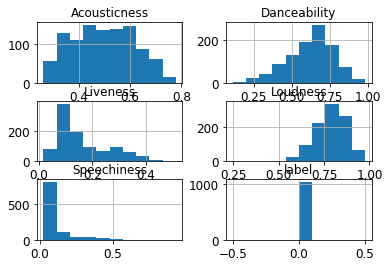

In [25]:
songs[songs['label']==0].hist()
songs[songs['label']==0].mean()
#High acousticness, mid danceability and loudness
#Chill?

In [26]:
songs[songs['label'] == 1].tail(30)

,Artist,Song,uri,Acousticness,Danceability,Liveness,Loudness,Speechiness,label
1482,The Black Keys,Howlin' For You,spotify:track:1gBGDhwhekrKYy7gqULf0t,0.029900,0.708,0.1010,0.838478,0.0943,1
4131,Modena City Ramblers,The Trumpets Of Jericho,spotify:track:7KovsQCwKJRG7sgdvuUnsc,0.268000,0.529,0.3180,0.838668,0.0279,1
1483,The White Stripes,Blue Orchid,spotify:track:6vluCORdF8bV6zhXfKyKBp,0.110000,0.481,0.3000,0.790571,0.3110,1
865,Foo Fighters,All My Life,spotify:track:6tsojOQ5wHaIjKqIryLZK6,0.000218,0.577,0.4770,0.864620,0.0495,1
2323,The Flaming Lips,The W.A.N.D.,spotify:track:2frHiHPVkiNCBMPkYF83Jr,0.070000,0.526,0.2100,0.925516,0.2610,1
3645,The Irish Rovers,The Bonnets of Bonnie Dundee,spotify:track:3LbNPQnOuGVlUWjYN3gnlo,0.286000,0.361,0.2890,0.743016,0.0545,1
3122,Sheelanagig,Baba Yaga's Ball,spotify:track:2YyZk38IbVH6nvL5wmy0Rt,0.085100,0.491,0.0583,0.853478,0.0773,1
213,Squid,The Cleaner,spotify:track:5JCJRbheraNHacbn9v1UWg,0.014900,0.490,0.1040,0.840924,0.0830,1
1533,The Raconteurs,Salute Your Solution,spotify:track:4GTCwHf5tLna3yW6HJ1DvW,0.007810,0.266,0.2600,0.942011,0.1710,1
2132,Grieves,Recluse,spotify:track:65Lga8E7jro12jIHMTWtNQ,0.158000,0.651,0.1060,0.823043,0.3000,1


Acousticness    0.089456
Danceability    0.596458
Liveness        0.164825
Loudness        0.821672
Speechiness     0.092847
label           1.000000
dtype: float64

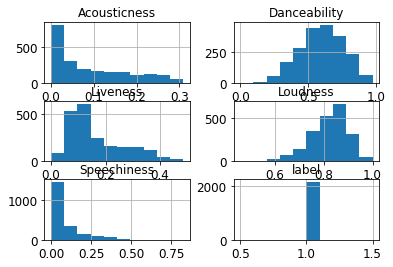

In [27]:
songs[songs['label']==1].hist()
songs[songs['label']==1].mean()
#High Loudness, Low speechiness and acousticness, Mid Danceability
#Energetic

In [28]:
songs[songs['label'] == 2].tail(40)

,Artist,Song,uri,Acousticness,Danceability,Liveness,Loudness,Speechiness,label
4108,Modena City Ramblers,Occupy World Street,spotify:track:2fhmMOMoOJx49O4h6VGTc5,0.17700,0.583,0.778,0.887527,0.0392,2
3864,The Irish Rovers,Mick Maguire,spotify:track:0ZhQsbYSOU58F1wfrkmob1,0.77300,0.588,0.713,0.829484,0.0888,2
2355,Handsome Boy Modeling School,Rock N' Roll (Could Never Hip Hop Like This),spotify:track:2ye5A347XzzLI66C718tN2,0.01520,0.550,0.793,0.810217,0.4330,2
3001,Primal Scream,Beautiful Summer,spotify:track:4XoWZ6oyCQRWTnbc64sc6a,0.01780,0.652,0.823,0.777038,0.0281,2
2537,Gorillaz,Interlude: The Non-Conformist Oath,spotify:track:0SOFBIQK3vOn3y7Yq0Bwzx,0.36000,0.474,0.382,0.689891,0.7290,2
1268,Alex Wiley,Games,spotify:track:5mBLsGeDozivo9EmIBid2H,0.19700,0.763,0.526,0.832908,0.2200,2
1927,Saba,Photosynthesis,spotify:track:3DlgDXIYtnWtJKiB8bZQMv,0.53600,0.777,0.593,0.791522,0.2700,2
2279,Miike Snow,Genghis Khan,spotify:track:6MDijuuArPJv1vbp7K1x3f,0.04000,0.688,0.598,0.931603,0.0508,2
2552,Gorillaz,Interlude: The Elephant,spotify:track:0lFjKxkSIEMOVgTevxl67A,0.58900,0.000,0.588,0.589022,0.0000,2
3743,The Irish Rovers,The Maid of Coolmore,spotify:track:6AFXQA7oQPrTn83Mvjwq3f,0.55700,0.380,0.531,0.851413,0.0254,2


Acousticness    0.290976
Danceability    0.551956
Liveness        0.688777
Loudness        0.813338
Speechiness     0.118800
label           2.000000
dtype: float64

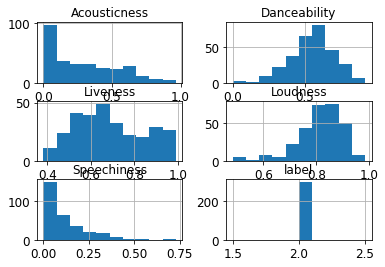

In [29]:
songs[songs['label']==2].hist()
songs[songs['label']==2].mean()
#Groovy

In [23]:
songs[songs['label'] == 3].tail(50)

,Artist,Song,uri,Acousticness,Danceability,Liveness,Loudness,Speechiness,label
2964,Gorillaz,Sweepstakes (feat. Mos Def and Hypnotic Brass ...,spotify:track:5SM5amC17V4itA5jxIICjS,0.114000,0.724,0.2140,0.910435,0.1780,3
1006,Cosmo Pyke,Great Dane,spotify:track:6OCFXXVmoPFtidXA7ey1SI,0.104000,0.498,0.0688,0.855190,0.1760,3
2200,Gorillaz,Kansas,spotify:track:7FJ7lHtpbWvPKe3zCoeAWC,0.072500,0.641,0.1750,0.844239,0.0272,3
3439,Folkstone,Il confine,spotify:track:6wqJEKAkt9GDJpOS1muj85,0.000109,0.539,0.1450,0.924701,0.0518,3
4259,Israel Vibration,Stinky Mouth,spotify:track:7cMXzHVuDhrf4MMv6QqBkN,0.042100,0.821,0.0822,0.666033,0.0796,3
78,Queen,Another One Bites The Dust - Remastered 2011,spotify:track:5vdp5UmvTsnMEMESIF2Ym7,0.112000,0.933,0.1630,0.843723,0.1610,3
3059,Ian Dury & The Blockheads,Dance Little Rude Boy,spotify:track:3YtCyBfmcCFLOPTwg0WixA,0.193000,0.672,0.1580,0.878859,0.0622,3
1481,Songhoy Blues,Bamako,spotify:track:7IyHsVQL3SVF20lQqWNxC6,0.032100,0.754,0.0996,0.804783,0.1930,3
1899,Gabriel Garzón-Montano,Fruitflies,spotify:track:4AyF3otW64PCw45b1ENW77,0.073000,0.646,0.0325,0.683696,0.0380,3
2204,Gabriel Garzón-Montano,Fruitflies (Instrumental),spotify:track:3rrym2g2ZYFuGee03Fmweb,0.149000,0.617,0.0515,0.641467,0.0683,3


Acousticness    0.832358
Danceability    0.504054
Liveness        0.175428
Loudness        0.680958
Speechiness     0.069594
label           3.000000
dtype: float64

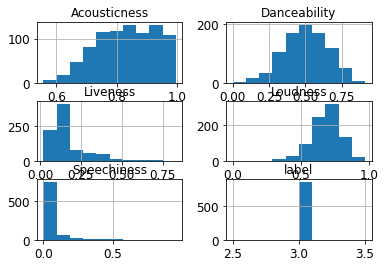

In [30]:
songs[songs['label']==3].hist()
songs[songs['label']==3].mean()
#Not too loudy and danceable, also acoustic
#Melancholic Mood?

In [45]:
dataframe_text=songs.replace({'label':{3:'Chill', 1:'Energetic', 2:'Groovy', 0: 'Melancholic'}})
songs.to_csv('../spark/dataset/songs_training_set.csv',index=False)
dataframe_text.head(50)

,Artist,Song,uri,Acousticness,Danceability,Liveness,Loudness,Speechiness,label
325,Reflection Eternal,Memories Live,spotify:track:0kHIEdWbOvnrvTmRfPtHDN,0.556000,0.607,0.6230,0.820027,0.3150,Groovy
2530,Pixies,Where Is My Mind?,spotify:track:6mcxQ1Y3uQRU0IHsvdNLH1,0.015700,0.518,0.0790,0.635516,0.0349,Energetic
1345,Eagles Of Death Metal,Wannabe In L.A,spotify:track:68HGqHHc41qmJHUWlLUKCd,0.276000,0.626,0.0989,0.912527,0.0451,Energetic
3819,The Irish Rovers,Drunken Sailor,spotify:track:5Su5ILFp6U83cnIXwfmlC5,0.626000,0.668,0.0932,0.880054,0.0418,Melancholic
2282,L.A. Salami,The City Nowadays,spotify:track:1xHzVdynfhhWxLQU1DPZjA,0.269000,0.403,0.2110,0.844701,0.1900,Energetic
4282,Mellow Mood,Well Well Well,spotify:track:5eOjON7wQJtT6msAbWnmOr,0.031400,0.811,0.0335,0.870299,0.0410,Energetic
2697,Modena City Ramblers,Come nuvole lontane,spotify:track:1Doju3322MqFsBx0s3zxKz,0.318000,0.739,0.0860,0.776984,0.0281,Melancholic
2362,Stoop Kids,Better Left Unsaid,spotify:track:6zWBBXjIR8acAsILUwgjnX,0.004310,0.781,0.1060,0.831141,0.0406,Energetic
130,atm,miami nights,spotify:track:6d5M1q7nhBOFeEcdTeNXM3,0.485000,0.796,0.1260,0.790217,0.1080,Melancholic
1231,Eels,Susan's House,spotify:track:64003fAAbyRqenrDKa6BdI,0.222000,0.736,0.3100,0.697717,0.0396,Energetic
